<div style="text-align: center;">
    <img src="images/banner.jpg" style="width:6500px;height:450px;">
</div>

# **CO2 Emissions Prediction Using Python**

This project focuses on developing a model to predict CO2 emissions based on engine size using Python. The dataset used is `FuelConsumption.csv`, which contains features like engine size and CO2 emissions. The workflow begins by importing essential libraries, including numpy, pandas, and matplotlib, for data manipulation and visualization.

The data is loaded and initially explored through descriptive statistics to understand its structure and key metrics. Key features, specifically `ENGINESIZE` and `CO2EMISSIONS`, are selected for analysis. A scatter plot is created to visualize the relationship between these variables.

The dataset is split into training and testing sets to evaluate the model's performance. Z-score normalization is applied to standardize the data, making the features comparable. Another scatter plot of normalized data ensures that the normalization process is correctly implemented.

A cost function is defined to measure the prediction error, followed by calculating gradients necessary for the optimization process. The gradient descent algorithm is employed to minimize the cost function iteratively, updating the model's parameters. Training the model involves multiple iterations, tracking the cost reduction over time.

The results are plotted to visualize the cost function's behavior and the regression line fitted to the normalized data. The model's parameters are then de-normalized to apply the predictions to the original data scale. A prediction function is defined, allowing the model to make predictions on new data points.

Random samples from the test data are selected to demonstrate the model's prediction accuracy. The predictions are printed alongside actual values, showcasing the model's effectiveness in predicting CO2 emissions based on engine size.

## 1. Import Packages

<div style="text-align: center;">
    <img src="images/import.jpg" style="width:600px;height:450px;">
</div>


This block imports essential libraries required for data analysis and visualization: math for mathematical functions, numpy for numerical operations, pandas for data manipulation, and matplotlib for plotting.

In [151]:
# !pip install pandas , numpy, matplotlib
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 2. Data Set

#### 2.1 Import Data Set
<div style="text-align: center;">
    <img src="images/load.jpg" style="width:600px;height:450px;">
</div>

This block loads the dataset *FuelConsumption.csv* into a DataFrame and displays the first few rows to understand the structure and content of the data.

In [152]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### 2.2 Descriptive Statistics
<div style="text-align: center;">
    <img src="images/descriptive.jpg" style="width:600px;height:450px;">
</div>
This block generates summary statistics of the DataFrame, providing insights into the distribution and central tendencies of the data.

In [153]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### 2.3 Selecting Features
<div style="text-align: center;">
    <img src="images/features.jpg" style="width:600px;height:450px;">
</div>
This block creates a new DataFrame with only the features *ENGINESIZE* and *CO2EMISSIONS*, focusing on the variables of interest for the analysis.

In [154]:
new_df = df[["ENGINESIZE", "CO2EMISSIONS"]]
new_df.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


#### 2.4 Scatter Plot
<div style="text-align: center;">
    <img src="images/plot.jpg" style="width:600px;height:450px;">
</div>
This block creates a scatter plot to visualize the relationship between engine size and CO2 emissions.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


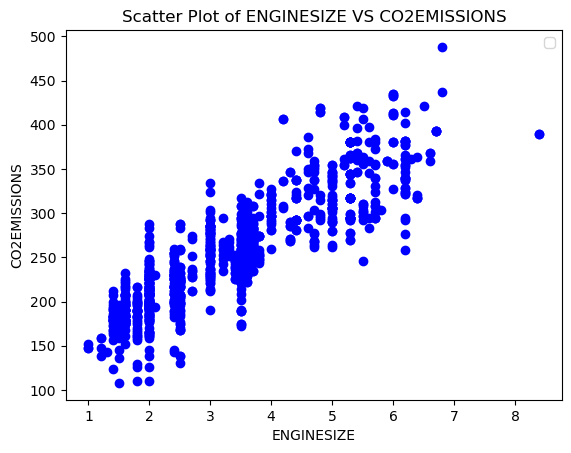

In [155]:
plt.scatter(new_df["ENGINESIZE"], new_df["CO2EMISSIONS"], c = 'blue' )

plt.title('Scatter Plot of ENGINESIZE VS CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()

plt.show()

#### 2.5 Splitting Data into Training and Testing Sets
<div style="text-align: center;">
    <img src="images/split.jpg" style="width:600px;height:450px;">
</div>
This block splits the dataset into training (70%) and testing (30%) sets for model evaluation.

In [156]:
X = new_df['ENGINESIZE'].to_numpy()
y = new_df['CO2EMISSIONS'].to_numpy()

split_index = int(0.7 * len(X))

train_X = X[:split_index]
test_X = X[split_index:]
train_y = y[:split_index]
test_y = y[split_index:]

print(f"X_train : {train_X[:5]}")
print(f"Y_train : {train_y[:5]}")
print(f"X_test : {test_X[:5]}")
print(f"Y_test : {test_y[:5]}")

X_train : [2.  2.4 1.5 3.5 3.5]
Y_train : [196 221 136 255 244]
X_test : [3.5 4.7 4.7 4.7 5.5]
Y_test : [202 267 269 262 297]


#### 2.6 Z-score Normalization
<div style="text-align: center;">
    <img src="images/z-score.jpg" style="width:600px;height:450px;">
</div>
This block defines and applies z-score normalization to standardize the training data.

In [157]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    x_norm = (X - mu) / sigma

    return (x_norm, mu, sigma)

#### 2.7 Normalized Scatter Plot
<div style="text-align: center;">
    <img src="images/norm.jpg" style="width:600px;height:450px;">
</div>
This block creates a scatter plot of the normalized features.

In [187]:
X_norm_t, mu_X, sigma_X = zscore_normalize_features(train_X)
y_norm_t, mu_y, sigma_y = zscore_normalize_features(train_y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


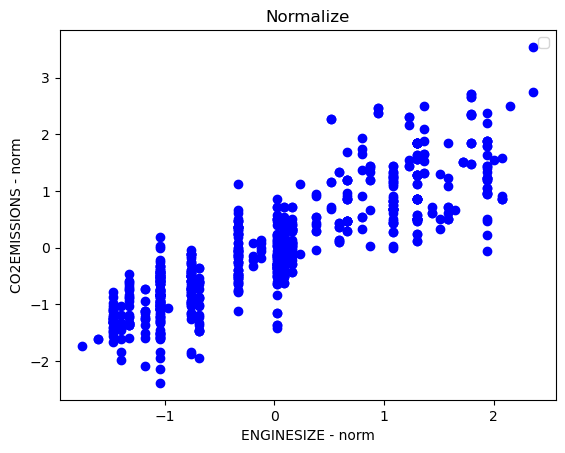

In [159]:
plt.scatter(X_norm_t, y_norm_t, c = "blue")

plt.title('Normalize')
plt.xlabel('ENGINESIZE - norm')
plt.ylabel('CO2EMISSIONS - norm')
plt.legend()

plt.show()

## 3. Build Linear Regression Model

### 3.1 Compute Cost 
<div style="text-align: center;">
    <img src="images/cost.jpg" style="width:600px;height:450px;">
</div>
This block defines the cost function for linear regression.

In [160]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * X[i] + b
        cost_sum += np.square(f_wb - y[i])        
    return (1 / (2*m)) * cost_sum

### 3.2 Compute Gradient
<div style="text-align: center;">
    <img src="images/gradient.jpg" style="width:600px;height:450px;">
</div>
This block defines the gradient calculation for the cost function.

In [161]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * X[i] + b
        dj_dw_i = (f_wb - y[i]) * X[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

### 3.3 Gradient Descent
<div style="text-align: center;">
    <img src="images/gradient descent.jpg" style="width:600px;height:450px;">
</div>
This block implements the gradient descent algorithm to optimize the parameters *w* and *b*.

In [162]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iteration, compute_cost, compute_gradient):

    J_history = []
    P_history = []
    b = b_in
    w = w_in

    for i in range(num_iteration):

        dj_dw, dj_db = compute_gradient(X, y, w, b)

        w -=  alpha * dj_dw
        b -= alpha * dj_db

        if i<100000:      
            J_history.append(compute_cost(X, y, w , b))
            P_history.append([w,b])
        
        if i% math.ceil(num_iteration/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, P_history


## 4. Train and Predict

#### 4.1 Train a Model 
<div style="text-align: center;">
    <img src="images/train.jpg" style="width:600px;height:450px;">
</div>
This block initializes and trains the model using gradient descent.

In [212]:
w_init = 0
b_init = 0

iterations = 100000
tmp_alpha = 0.01 #0.08

w_final, b_final, J_hist, p_hist = gradient_descent(X_norm_t, y_norm_t, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final} , {b_final})")

Iteration    0: Cost 4.93e-01  dj_dw: -8.670e-01, dj_db: -9.525e-18   w:  8.670e-03, b: 9.52470e-20
Iteration 10000: Cost 1.24e-01  dj_dw: -5.546e-15, dj_db: -3.378e-17   w:  8.670e-01, b:-1.11001e-16
Iteration 20000: Cost 1.24e-01  dj_dw: -5.500e-15, dj_db:  3.468e-17   w:  8.670e-01, b:-1.11150e-16
Iteration 30000: Cost 1.24e-01  dj_dw: -5.500e-15, dj_db:  3.468e-17   w:  8.670e-01, b:-1.11299e-16
Iteration 40000: Cost 1.24e-01  dj_dw: -5.546e-15, dj_db: -3.378e-17   w:  8.670e-01, b:-1.10763e-16
Iteration 50000: Cost 1.24e-01  dj_dw: -5.546e-15, dj_db: -3.378e-17   w:  8.670e-01, b:-1.10912e-16
Iteration 60000: Cost 1.24e-01  dj_dw: -5.500e-15, dj_db:  3.468e-17   w:  8.670e-01, b:-1.11061e-16
Iteration 70000: Cost 1.24e-01  dj_dw: -5.500e-15, dj_db:  3.468e-17   w:  8.670e-01, b:-1.11210e-16
Iteration 80000: Cost 1.24e-01  dj_dw: -5.500e-15, dj_db:  3.468e-17   w:  8.670e-01, b:-1.11359e-16
Iteration 90000: Cost 1.24e-01  dj_dw: -5.546e-15, dj_db: -3.378e-17   w:  8.670e-01, b:-1.1

#### 4.1 Plot The Cost Func & Y-hat Prediction
<div style="text-align: center;">
    <img src="images/plot result.jpg" style="width:600px;height:450px;">
</div>
This block plots the cost function over iterations and the final linear regression model on the normalized data.

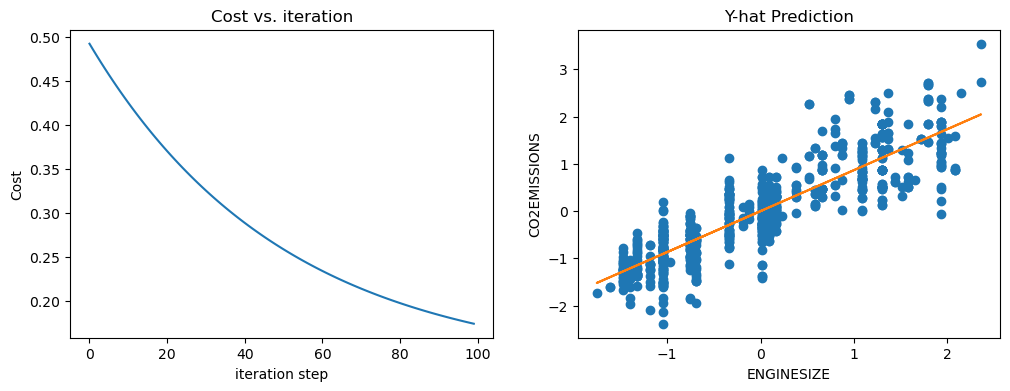

In [213]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(J_hist[:100])
ax1.set_title('Cost vs. iteration')
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step') 

ax2.plot(X_norm_t, y_norm_t, 'o')
yhat = w_final * X_norm_t + b_final
ax2.plot(X_norm_t, yhat)
ax2.set_title('Y-hat Prediction')
ax2.set_xlabel('ENGINESIZE')
ax2.set_ylabel('CO2EMISSIONS')

plt.show()

#### 4.2 Prediction

In [214]:
# De-normalizing Parameters
w = w_final * (sigma_y / sigma_X)
b = b_final * sigma_y + mu_y - np.sum((w_denorm * mu_X))

In [216]:
def predict(x):
    predict = []
    m = x.shape[0]
    for i in range(m):
        prediction_i = w * x[i] + b
        predict.append(prediction_i)
    return predict

In [217]:
def print_prediction(x, y):
    for i in range(len(x)):
        print(f'Y-hat of index {i} is : {x[i]} -- Y is : {y[i]}')

In [218]:
import random
if len(test_X) != len(test_y):
    raise ValueError("Both arrays must have the same length")

# Number of random items to select
num_items = 10

# Generate random indices without replacement
random_indices = random.sample(range(len(test_X)), num_items)

selected_test_x = np.asanyarray([test_X[i] for i in random_indices])
selected_test_y = np.asanyarray([test_y[i] for i in random_indices])

print(f'Selected test X: {selected_test_x}\n')
print(f'Selected test Y: {selected_test_y}\n')

prediction = predict(selected_test_x)

print_prediction(prediction, selected_test_y)

Selected test X: [3.6 3.5 1.5 2.5 6.6 1.8 1.8 1.6 3.6 4.7]

Selected test Y: [281 189 163 175 359 170 177 196 313 278]

Y-hat of index 0 is : 272.6450892070267 -- Y is : 281
Y-hat of index 1 is : 268.7208050154178 -- Y is : 189
Y-hat of index 2 is : 190.2351211832401 -- Y is : 163
Y-hat of index 3 is : 229.47796309932895 -- Y is : 175
Y-hat of index 4 is : 390.3736149552932 -- Y is : 359
Y-hat of index 5 is : 202.00797375806675 -- Y is : 170
Y-hat of index 6 is : 202.00797375806675 -- Y is : 177
Y-hat of index 7 is : 194.15940537484897 -- Y is : 196
Y-hat of index 8 is : 272.6450892070267 -- Y is : 313
Y-hat of index 9 is : 315.8122153147244 -- Y is : 278
